In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/datasets/onemonth_nodeload5.csv')
#df.set_index('ds',inplace=True)
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                    ds     y
0  14/05/2024 04:37:05  2.90
1  14/05/2024 04:37:10  2.90
2  14/05/2024 04:37:15  2.95
3  14/05/2024 04:37:20  2.95
4  14/05/2024 04:37:25  2.95
                         ds     y
526528  13/06/2024 23:59:40  2.53
526529  13/06/2024 23:59:45  2.56
526530  13/06/2024 23:59:50  2.56
526531  13/06/2024 23:59:55  2.56
526532  14/06/2024 00:00:00  2.56
                   y
count  526533.000000
mean        4.342593
std         2.204463
min         0.860000
25%         2.210000
50%         4.640000
75%         5.990000
max        12.990000
ds     object
y     float64
dtype: object
526533


<Axes: >

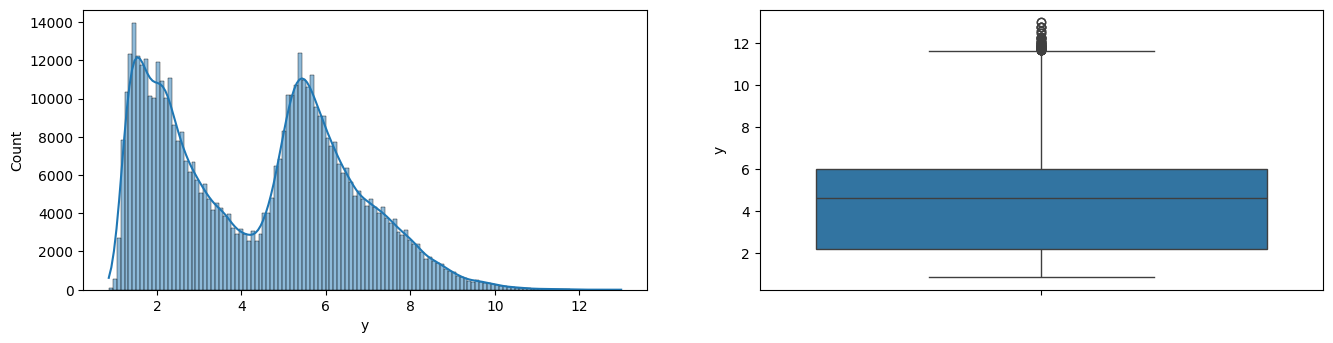

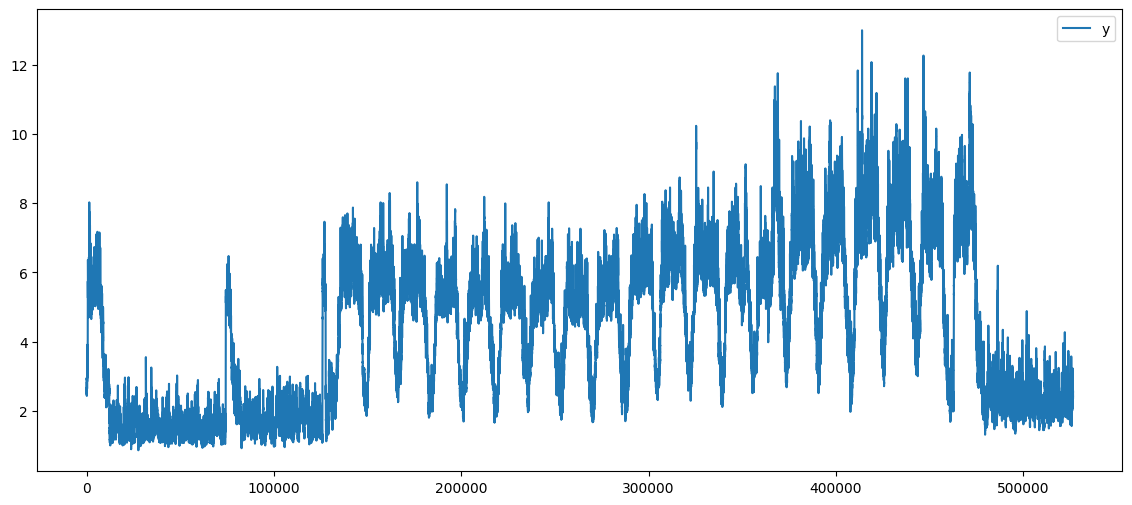

In [3]:
import seaborn as sns
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(df['y'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(data = df['y'])
df.plot(figsize=(14, 6))

In [4]:
#finding iqr, upper limit and lower limit
import numpy as np
q3, q1 = np.percentile(df['y'],[75,25])
iqr = q3-q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print(f"iqr : {iqr}")
print(f"upper limit : {upper_limit}")
print(f"lower limit : {lower_limit}")

iqr : 3.7800000000000002
upper limit : 11.66
lower limit : -3.46


In [5]:
#finding outliers

df[df['y']>upper_limit].count()

ds    62
y     62
dtype: int64

In [6]:
#Trimming

new_df = df[df['y'] <upper_limit]
print(new_df.describe())

                   y
count  526471.000000
mean        4.341689
std         2.203016
min         0.860000
25%         2.210000
50%         4.640000
75%         5.990000
max        11.640000


<Axes: ylabel='y'>

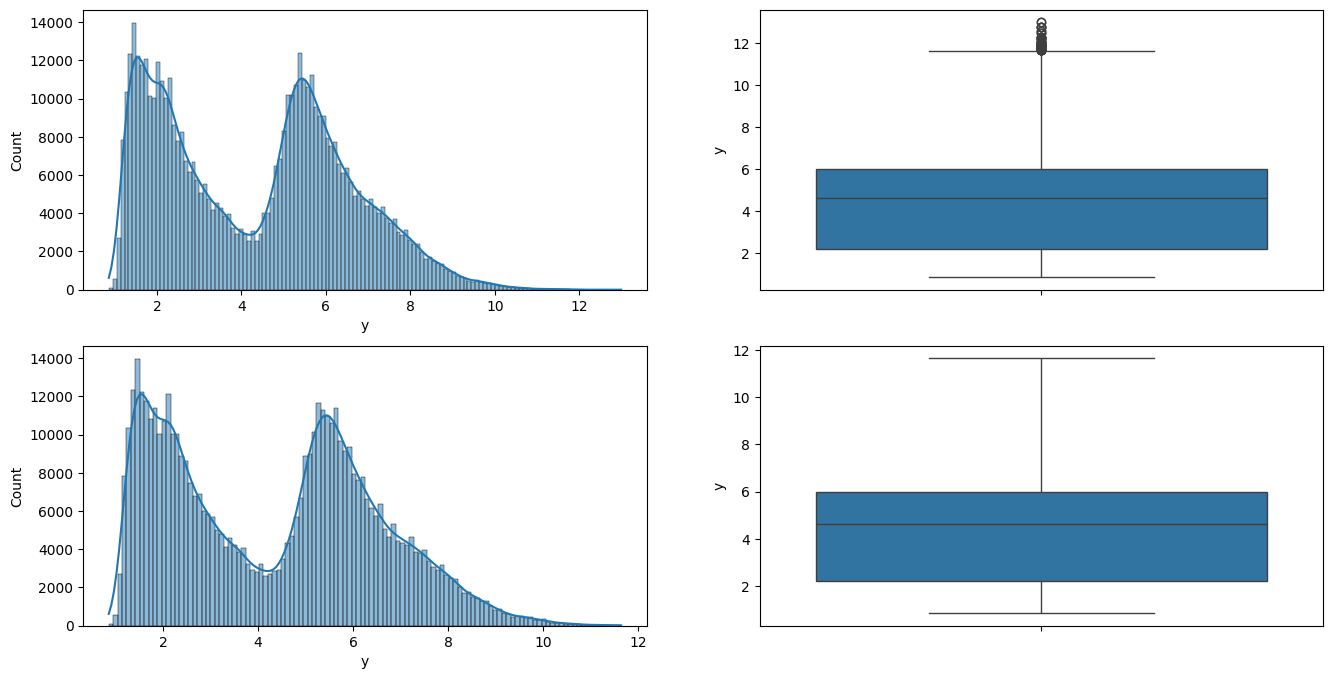

In [7]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.histplot(df['y'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(data = df['y'])

plt.subplot(2,2,3)
sns.histplot(new_df['y'], kde=True)
plt.subplot(2,2,4)
sns.boxplot(data = new_df['y'])

In [8]:
new_df.to_csv('../data/datasets/onemonthprocessed_nodeload5.csv', index=False)

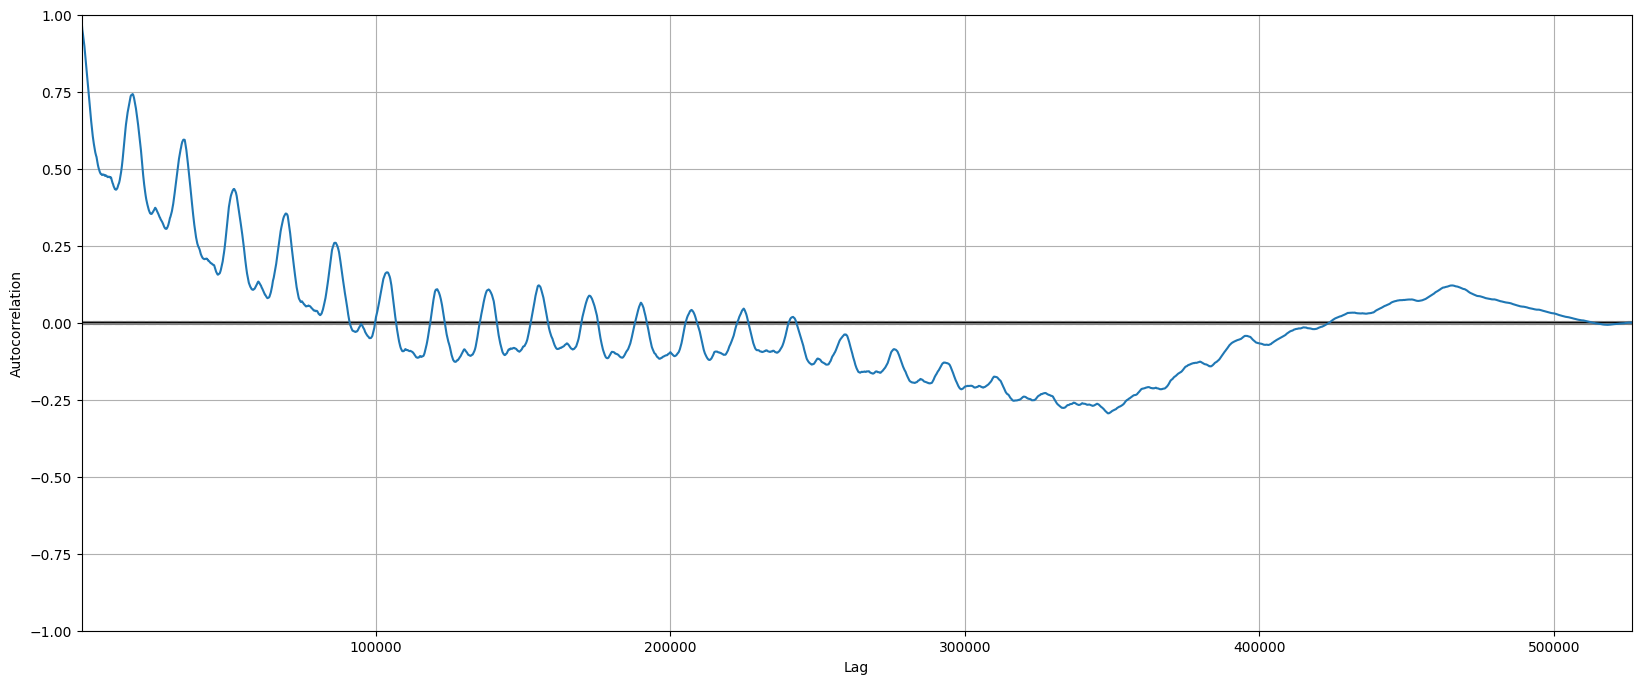

In [9]:
new_df.set_index('ds',inplace=True)
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (20,8))
autocorrelation_plot(new_df)
pyplot.show()